##### Multi Arm Bandit Implementation

- Implement a multi-armed bandit algorithm. Similar to Figure 2.1 in the Sutton & Barto book (Reinforcement Learning: An Introduction), provide a solution for a n-armed bandit, where n can be 8 or 10.

- Prepare a report explaining your solution and containing your results, and discussion of the results.

- Attach the source code as separate files. For example, .ipnb - an ipython notebook file.

##### Implementing with Numpy

Simple implementation of a multi-armed bandit algorithm in Python, based on the epsilon-greedy strategy described in Sutton & Barto's book.

Let's start with a function to initialize the bandit problem. This function takes as input the number of arms (n) and returns the true action values (q_star) and the initial estimates (Q).

In [1]:
import numpy as np

def init_bandit(n):
    q_star = np.random.normal(0, 1, n)
    Q = np.zeros(n)
    return q_star, Q

Next, we'll define a function to select the next action based on the current estimates. This function takes as input the current estimates (Q), the value of epsilon, and the number of actions (n). It returns the index of the selected action.

In [2]:
def select_action(Q, epsilon, n):
    if np.random.random() < epsilon:
        # Explore: choose a random action
        action = np.random.randint(n)
    else:
        # Exploit: choose the action with highest estimate
        action = np.argmax(Q)
    return action

Finally, we'll define the main loop of the bandit algorithm. This loop iterates over a number of steps (num_steps) and at each step selects an action, observes the reward for that action, and updates the estimate for that action.

In [3]:
def run_bandit(n, num_steps, epsilon):
    q_star, Q = init_bandit(n)
    N = np.zeros(n)  # number of times each action has been selected
    rewards = []     # history of rewards

    for i in range(num_steps):
        action = select_action(Q, epsilon, n)
        reward = np.random.normal(q_star[action], 1)
        rewards.append(reward)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

    return rewards

To test the algorithm, we can run it for a number of steps and compute the average reward over multiple runs. Here's an example:

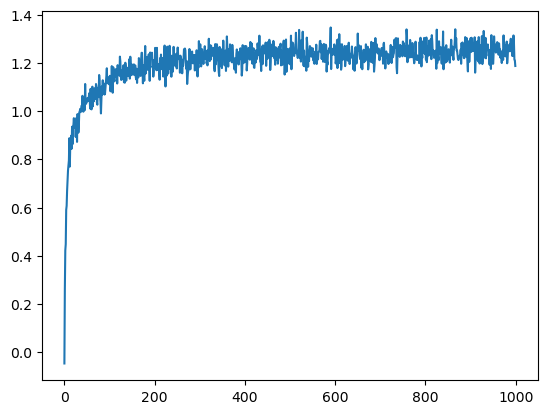

In [4]:
n = 8
num_steps = 1000
epsilon = 0.1
num_runs = 1000

avg_rewards = np.zeros(num_steps)
for i in range(num_runs):
    rewards = run_bandit(n, num_steps, epsilon)
    avg_rewards += (rewards - avg_rewards) / (i + 1)

import matplotlib.pyplot as plt
plt.plot(avg_rewards)
plt.show()

This code runs the bandit algorithm 1000 times, each time for 1000 steps, with an epsilon value of 0.1. It then computes the average reward over all runs and plots the result. You can adjust the values of n, num_steps, epsilon, and num_runs to experiment with different settings.

Comparing the bandit algorithm for epsilon values of [0.1, 0.01, 0] using NumPy

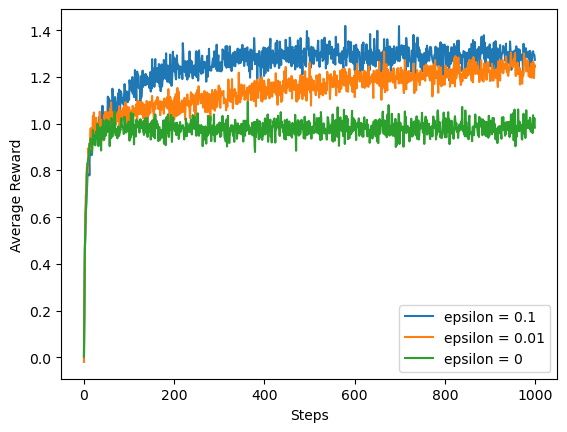

In [5]:
n = 8
num_steps = 1000
epsilons = [0.1, 0.01, 0]
num_runs = 1000

avg_rewards = np.zeros((len(epsilons), num_steps))
for i in range(num_runs):
    for j, epsilon in enumerate(epsilons):
        rewards = run_bandit(n, num_steps, epsilon)
        avg_rewards[j] += (rewards - avg_rewards[j]) / (i + 1)

import matplotlib.pyplot as plt
for i, epsilon in enumerate(epsilons):
    plt.plot(avg_rewards[i], label="epsilon = {}".format(epsilon))
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.show()

This code is similar to the previous implementation, but uses NumPy arrays instead of Python lists. The init_bandit function creates the true action values (q_star), the initial estimates (Q), and a list to keep track of how many times each action has been selected (N). The select_action function selects the next action based on the current estimates (Q) and the value of epsilon. Finally, the run_bandit function runs the main loop of the algorithm, selecting an action, observing the reward, and updating the estimates at each step.

The code then runs the bandit algorithm 1000 times, each time for 1000 steps, with epsilon values of 0.1, 0.01, and 0. It then computes the average reward over all runs and plots the results for each epsilon value on the same plot. You can adjust the values of n, num_steps, epsilons, and num_runs to experiment with different settings.